# Homework Assignment #3

### 1. Creating a Good Figure (20%)
Presenting your data well is an important aspect of science
* Import the **numpy** module
* Import the **matplotlib.pylot** module
* To help with this question, you can check the matplotlib.pyplot documentation for plotting functions: https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html
* Create a numpy array called $x$, which starts at 0, ends at 10 and has 500 data points
* Plot the function $f(x) = x sin(x^2) $ against $x$ (where the horizontal axis is $x$)
* Change the colour of the plotted line to "Green"
* Label your axis "x" and "f(x)" and set the font size so it is appropriate.
* Give you plot a title and add a grid to your plot
* How many times does the function pass through 0 in the range 0<x<10?  Answer this in a docstring below the line where you plot the function $f(x)$.

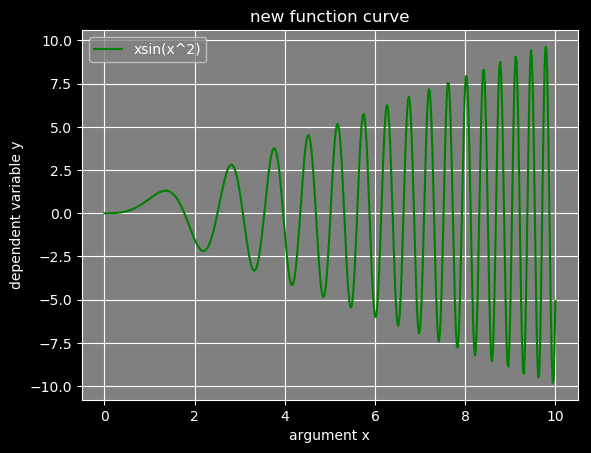

Help on function num_0 in module __main__:

num_0(values)
    The number that function pass through 0 in the range 0<x<10 is 31

31


In [54]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10,500) # divide [0,10] into 499 segements == 500 points
def f(x):
    return x * np.sin(x**2)
def num_0(values):
    """
    The number that function pass through 0 in the range 0<x<10 is 31
    """
    sum = 0
    for index in range(0,len(values)-1):
        if values[index]*values[index+1]<0:
            sum += 1
    return sum
plt.rcParams['axes.facecolor'] = 'gray'
plt.plot(x, f(x), color='g', label='xsin(x^2)')
plt.xlabel('argument x')
plt.ylabel('dependent variable y')
plt.title('new function curve')
plt.grid()
plt.legend() # show legend
plt.show()
print('{1}'.format(help(num_0),num_0(f(x))))



### 2. Visualising the convergence of the Basel Series (30%)
In HW#1, we looked at the Basel series $f(n)=\sum^n_1\frac{1}{n^2}=\frac{1}{1^2}+\frac{1}{2^2}+\frac{1}{3^2}+...+\frac{1}{n^2}$, and you have shown that when $n$ becomes very large, $f(n)\approx \pi^2/6$. Now we can visualise it by plotting it to a very large number (1e6).
* Create a series of integers from 1 to 1e6.
* Define a function that computes the Basel series in an appropriate way.
* Create a plot showing $f(n)$ against $n$, using a log scale on the horizontal axis. (HINT: you can use xscale() from pyplot to do this)
* Demonstrate that $f(n) \approx \pi^2/6$ as $n$ becomes very large using visualisation.

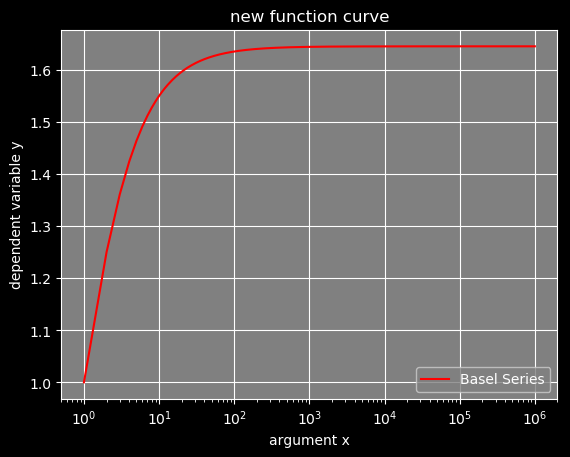

ultimate error between f(n)(n=1e6) and pi^2/6 is 1.000000456441441e-06


In [58]:

x = np.arange(1,1e6,1)
x = [int(i) for i in x]

def Basel(x):
    y = []
    sum = 0 # first value
    for i in range(1,x[0]+1):
        sum += 1/i**2
    y.append(sum)

    last_value = y[0] # use last value in x to avoid calculating repetively
    for index in range(1,len(x)):
        value = last_value
        for i in range(x[index-1]+1,x[index]+1):
            value += 1/i**2
        y.append(value)
        last_value = value
    return y


y = Basel(x)
plt.rcParams['axes.facecolor'] = 'gray'
plt.plot(x, y, color='r', label='Basel Series')
plt.xlabel('argument x')
plt.ylabel('dependent variable y')
plt.xscale('log')
plt.title('new function curve')
plt.grid()
plt.legend()
plt.show()

print("ultimate error between f(n)(n=1e6) and pi^2/6 is {0}".format(np.absolute(y[-1]-np.pi**2/6)))

### 3. Parametric Curves  (20%)

use the subplot() function to create **two panels** (left and right)

In the **left** panel:
* Define an array called $t$ ranging from -$\pi$ to +$\pi$ with 150 data points
* Compute a new array called $x$ by calculating the following equation: $1.5\cos\left(t\right)-\cos\left(30t\right)$
* Compute a 2nd array called $y$ by calculaing the following equation: $1.5\sin\left(t\right)-\sin\left(30t\right)$
* Next plot the curve with $x$ the horizontal axis and $y$ the vertical axis. Use the axis('equal') function from pyplot as well.

In the **right** panel:
* Plot the parametric equation:
</br>$x=16\sin^3(t)$
</br>$y=13\cos(t)-5cos(2t)-2cos(3t)-cos(4t)$
* Use the pyplot fill() function (i.e. fill(x,y)) and set the colour to "Red". Adjust your axes scales appropriately.
* What do you see?

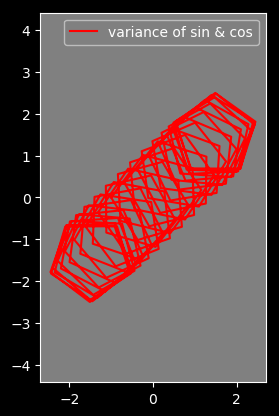

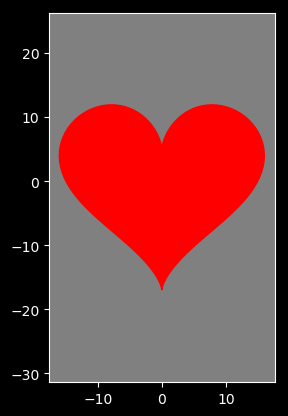

In [71]:
# panel 1 (left panel)
plt.subplot(1,2,1)
t = np.linspace(-np.pi, np.pi, 150)
x = 1.5*np.sin(t) - np.cos(30*t)
y = 1.5*np.sin(t) - np.sin(30*t)
plt.plot(x, y, color='r', label='variance of sin & cos')
plt.legend()
plt.axis('equal') # square image (x-axis and y-axis has the same unit)
plt.show()

# panel 2 (right panel)
plt.subplot(1,2,2)
x = 16*(np.sin(t)**3)
y = 13*np.cos(t)-5*np.cos(2*t)-2*np.cos(3*t)-np.cos(4*t)
plt.fill(x,y, color='r')
plt.axis('equal')
plt.show()



### 4.  Plotting and Determining Frequencies from Sunspot Data (30% + 30% Extra Credit)

In the code block below you will find a very long array named **"sunspot_data"** that contains monthly sunspot count data from 1750 - 2021.

* Create a new variable called **"years"** that in the from of an array covering the time range of the sunspot data. As the data does not end at Dec 2021, you should use _len(sunspot_data)_ to make sure this variable is formed properly.

* Next plot this data as a scatter graph with Years on the horizontal axis. You should change the size of the figure using figsize() to make sure that you can clearly see all the data. Make sure you label your axes and give the plot a title.

* You should see a clear "short" frequency in the data, this is the Solar cycle. Using the figure you produced estimate the length of the solar cycle (max sunspot count to max sunspot count) and print your estimate.

#### Extra Credit:

Another way to extract frequencies from data is using FFT (fast fourier transform). We will cover this in further detail later in this course.
* from the scipy.fftpack package import fft
* Create a variable called FFT by using the fft() function on sunspot_data
* You will need to create an array of frequencies: to do this create a variable called $N$ which is the length of sunspot data. a variable called $n$ which is an array going from 0 to N with integer steps using np.arange() and create a variable called $freq$ which is set by calculating $n/N$
* Plot a figure which has freqency on the horizontal axis and FFT on the vertical axis. Label your axes appropriately

* You will see a figure that has large peaks at the left and the right of the plot. We will focus on the left side of the figure
* Set your x axis to be limited between 0 and 0.03 and y axis between 0 and 100,000.
* Increase the number of ticks on your x-axis using the xticks() function so that you can clearly estimate the frequency value of the largest peak (ignore the peak at x=0)

* This frequency is in units of 1/yr, use the value you measured to extract an estimate of the length of the solar cycle and print this value as well.



In [72]:
import numpy as np
import matplotlib.pyplot as plt

sunspot_data =np.array([96.7,104.3,116.7,92.8,141.7,139.2,158,110.5,126.5,125.8,264.3,142,122.2,126.5,148.7,147.2,150,166.7,142.3,171.7,152,109.5,105.5,125.7,116.7,72.5,75.5,94,101.2,84.5,110.5,99.7,39.2,38.7,47.5,73.3,58.3,83.3,118.3,98.8,99.5,66,130.7,48.8,45.2,77.7,62.7,66.7,73.3,53.3,76.2,63.3,60,52.8,36.7,65,46.7,41.7,33.3,11.2,0,5,2.8,22.8,34.5,44.5,31.3,20.5,13.7,40.2,22,7,17,18.7,11.3,10.8,0,0,14.3,5.3,29.7,39.5,11.3,33.3,20.8,11.8,9,15.7,20.8,21.5,6,10.7,19.7,23.8,28.3,15.7,23.5,35.3,43.7,50,63.5,21.3,41.7,85.5,66.2,54.2,107.8,55.8,62.7,86.7,81.7,120.5,77.3,75,73.3,64.5,104.2,62.8,71.7,71.7,80.5,73.3,78,78.3,81.7,83.3,85,118.8,128.7,99.5,77.2,95,112.2,99.2,124.5,97.2,120,80.5,110,126,102.2,84.3,99.5,101.7,116.7,151.7,134.5,119.5,178.7,165.5,156.8,151.8,167.8,147.8,149.5,76.7,73,121.3,76.2,100.3,66.5,128.5,56.3,112.8,114.2,115.5,129.7,128.7,94.2,53.2,57,54.8,54.5,59.7,90.3,44.2,113.5,77.2,101.5,102.3,99.5,99.5,67,57.3,73.8,50,50,50,47,46.7,43.3,42.8,40,43.3,41.7,36.7,33.7,33.3,45,49.5,26.7,23.3,23.3,21.7,20,18.3,61,10,44.7,5,5.5,6.7,7.2,8.3,9.5,32,45.7,50,71.7,54.8,49.7,55.5,36.5,68,71.2,73.5,91.2,88.8,89.2,110.2,77.2,71.2,129.5,129,87.7,111.3,124.7,129.7,151,186.3,123.2,107,107.2,161.2,122.7,157.3,197.7,200.5,248,263.7,246.8,186.7,173.3,237.5,133.5,85,116.8,138.8,183,210.5,174,172.7,220.3,170.5,60,77,77.8,108.2,254.5,199.2,112.8,97.5,169,150,166.2,159.5,168.2,151.3,51.8,153.7,63.3,95,128.8,93.7,84.2,131,102.2,106.7,91,48.3,85.3,54.8,68.5,47.3,46.2,21.2,48.8,43.8,68.2,72,78,109,92.8,73,85.5,47.5,29.2,11,13.2,23.3,29.5,20.3,7.3,0,19.3,18.7,6.5,20.5,1.7,13.2,5.3,9.3,25.2,13.2,36.2,19.3,10.5,36.3,18.7,31.7,1.7,40.3,26.7,50,58.3,66.7,75,60.8,65,159.2,133.8,134.5,158.3,186.7,193.7,177.5,243.3,262.2,295.5,182.2,223.3,241.7,398.2,286,255,233.3,286.2,260.5,250.5,175,191.2,276.2,196.7,241.7,233.3,189.5,238.3,186.7,185,206.7,190,183.3,116.7,163.3,163.3,158.3,178.7,146.7,143.3,143.3,156.2,128.3,100,97.8,164.5,124.5,88.3,113.8,174.5,162.8,122.5,110,85,45.5,111.7,58.7,90,62.5,61.7,68.3,90.5,63.3,61.7,73.3,56.7,38.7,52.5,50,46.7,64.5,44.5,47.2,38.3,42,53.7,33.3,30,13.3,25,17.5,21.7,13.3,18.3,16.7,10,15,10,16.7,16.7,13.3,28.3,23.3,10.8,13.3,15,26.2,34.5,43.8,60.5,33.3,53.3,78.7,67,45.5,62,79.3,79.5,142.3,153.8,98.3,138.3,149.5,185.8,187.2,193.3,187.8,224.5,176.7,145.7,212,224.7,165.3,213.3,228.7,262.2,261.7,235.8,290,230,215.3,238.8,180.8,188.3,257,235.8,226.7,235,236.7,157.8,215.8,190,208.8,200,205.5,205.8,200,195,171.7,186.7,149.5,223.3,225.8,171.7,212.5,160.5,156.7,155,151.7,115.5,145,128.8,140.5,136.7,123.3,121.2,103.3,123.3,128.7,122.8,107,118.3,71.7,110.8,102.8,111.7,110,96.7,106.7,105,126.2,103.3,101.7,76.3,100,98.3,98.3,95,93.3,93.3,91.7,92.5,88.3,87.2,85,83.3,48.8,40,78.3,73.3,76.2,75,73.3,63.3,47.3,92.8,69.2,68.3,66.7,18.5,47.5,112.3,85.7,35.7,66.5,21,31,51.7,28.5,21.5,42.8,22.5,32.5,41.7,30,36.7,39.7,26.2,52.8,35,11.2,44.8,2.5,30.7,18.3,14,8.5,24,7,6.7,6.7,12.2,18.5,7.2,10,9.5,11.5,9.7,5,3.3,6.7,20.7,1.8,0,0,0,5,4,2.5,20.8,16.5,2.7,21,36.2,14,13.7,17.7,3.5,0,0,7.7,4.5,14.3,11.5,15.5,23.2,0,8.3,39.5,35,32.5,19.2,20.5,17.5,66.8,45,48.3,50,51.7,53.3,52,58.3,64.5,55.8,54.3,66.3,80.3,79.7,78.3,68,70,73.3,76.7,80,83.3,86.3,64.2,57.5,83.3,83.3,84.7,49.2,41.7,73.8,60,80.5,56.8,75.5,90.5,85,80,75.5,80.5,80,84.3,55.7,58,49.7,71.8,88.3,103.8,101.7,100,101.7,73.5,85.7,62.5,65,67.5,62.7,71.2,74,49,68.3,63.8,65,49.3,54.5,46.2,44,42.7,50,43.8,40,45,41.7,40,20,20.3,16,39.7,16.7,20,21.2,20,9.5,13.3,4.3,0,0,7.5,0,20.5,22.5,22.5,11.2,13.3,19.5,7.8,17.5,20.5,12,15.3,1.5,4.2,3.3,12.8,0.5,0.3,0.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,4,10.2,1.3,1.8,18.8,3.2,1.2,0,1.7,2.2,0.8,26,8.7,6.5,13.2,16.8,0,17.2,3.2,27.7,9.2,18.7,30.5,14,25.5,46.3,27.8,23.8,37,20,9.5,39.7,9.7,24.8,30.8,3.8,13.5,32.2,24.2,33.5,32,53.7,43.7,52.7,16.3,93.2,59.2,78.7,52.5,55.8,62,108.3,43.8,114.7,122.8,98,73.8,72.7,64.7,38.7,79.7,94,63.5,49.8,60.7,96.5,160.3,44,35.3,66.7,83.3,75,61.2,42.7,48.2,47.3,58.1,37.4,42.4,57.5,88.5,60.8,46.8,52.6,43.4,52.8,18.3,43,54.7,34.6,6.3,33.7,32.6,58.3,52.5,43.5,24.8,45.9,41.8,50.9,32,44.4,7.5,32.3,48.9,17.9,34.1,43.1,8.6,14.9,13.2,15.1,36,7,9.5,15.2,2.8,3,4.3,8,7.3,31.4,7.3,0.4,0,1.5,26.9,21.7,2.4,9.3,13.2,3.4,0,0.6,0,0,0,0,1,0,0,0,0.8,0,0,0,0,34,36,18,0,32.3,4.6,0,0,2.3,34.3,42,0,1.4,8.4,25.9,37.4,6.2,25.8,25.6,51.5,42.8,26.2,26,19.6,36.7,29.4,30.2,61.3,40,53.9,61.7,87.5,66,31.6,84.4,65.8,113.6,57.7,79,96.3,76.7,93.8,94.4,70.4,89.4,82.6,93.5,80.4,76.8,88,107.3,108.5,101.9,148.6,163.4,90.4,127.3,83.9,91.1,95,78.1,71.6,82.3,120.6,158.4,112.3,123.2,151.5,129.3,88,95.3,112.7,94.1,87,120.1,141,177.3,110.5,108.4,73.2,84.6,103.4,140.6,135.4,136.8,79,83.6,155.8,90.9,63.4,55.6,75.4,91.6,63.2,77.1,72.5,48.3,51.5,92.6,91.9,44.8,68.9,44.5,23.3,14.8,13.7,35.2,23.8,45.8,18.7,24.9,19.6,4.6,21.5,1.7,11.6,9.5,19.3,12.5,9.8,16.6,8.2,30.1,6.5,2.4,14.8,13.1,14.4,6.6,19.2,41.3,50.9,57.5,12.4,40.7,32.7,102.4,72.6,55.2,99.6,98.5,168,158.6,166.7,129.3,147.6,179.4,163.7,238,185.7,207.9,194.6,179.6,158.5,228.9,201.5,343.8,313.4,292.6,224.3,230.3,186.1,263.4,271.2,223.5,160.4,206.2,178.4,216.1,241.5,141.3,234.5,211.1,229.4,157.6,180.4,131.3,122.7,151.5,129.2,132.9,175.9,170.8,129.5,102.9,89.6,91.2,141.3,218.8,221.1,151.5,114.7,106.2,135.4,146.1,112.9,109.8,115.4,80.9,101,96.4,123.3,91.7,90.4,89.5,40.1,49.9,49.6,66.9,112.4,92.8,51.4,65.4,60.9,47.4,32.9,64.8,34,36.8,36.2,44.9,41.4,34.2,21,44.4,30.6,63.5,67.5,29.3,22.2,5.9,13.9,15.8,35.1,17.6,15.9,19.6,6.9,8.9,31.7,21.2,15.7,24.5,22.5,34.6,19.2,6.2,35.2,39.7,11.6,35.9,17.9,36,42.8,72.8,72.1,95,79.7,51.8,51,53.9,49.3,67.8,65.7,99.5,64.6,84.9,106.5,115.5,99.9,108.4,77.5,91.3,178.6,93.4,100.6,109.1,104.4,74.9,143,74.6,125.7,142.2,87.1,234.3,268.2,300.6,231.5,182.6,265.2,186.4,181.2,178.6,170.5,214.9,232,220.9,167.3,220.6,191,265.8,298.3,250.3,182.7,194.7,153.2,154.2,148.2,128.6,178,135.7,188.2,184.3,148.2,169.8,156.8,83.8,117,133,74.3,117,163.7,134.9,104.1,115.9,143.5,200.1,122.8,107.3,118.9,120,68.6,109,128.9,118.7,96.8,135.5,129.9,126.2,116.2,124.3,104.3,89,80,75.3,71.2,127.9,103.1,86.1,77.9,81.5,71.6,90.4,65.9,76,87.2,95.8,63.7,80.5,54.7,44.5,29.3,38,39.4,50.3,45.6,40.1,35.5,30.1,42.6,24.1,53.5,41.1,23.4,21.6,33,8.4,17.3,10,0.7,5.9,0,18.3,7.9,5.8,1,9.3,0.7,12.4,0,9.8,8.8,11.3,8.4,8.5,14.7,13.7,26,14.2,10,21.1,54.2,30.5,42.2,32,80.6,77.1,59.6,70.7,74.2,66.3,109.2,72.8,78.6,84.5,107.7,104.9,152.2,173.2,98.6,127,159,166.4,171.5,162.9,172.8,165.2,180.7,203,200.9,217.8,184.6,153.9,156.6,167.9,188,135.7,203.5,206.3,221.9,190.5,175.2,171.1,186,181.7,118.5,147.5,192,187.1,107.8,167.5,148.2,156.7,151.9,127.7,102,152.8,119.9,122.4,82.7,102.1,122.4,159.7,139.5,118.7,126.4,79.8,96,77.6,91.8,107.7,126,77.1,102.1,77.6,62,91.3,41.7,75.7,71.6,78.1,109.7,89.5,125.9,68.1,77.1,109.9,103.8,104.1,54.2,64.4,109.3,54.3,92.5,74.6,75,55.9,65.6,63.8,50.8,71.8,41,32.5,46.7,24.3,60,72.9,46.6,33.5,24.6,31.4,17.6,24.2,13.9,26.8,17.2,2.9,0,1.4,17.4,9.7,5.5,2.8,9.5,9.1,18.7,25.5,18.1,47.9,25.9,26.3,44,61.1,44.5,51.8,48.3,57.3,78.7,102.8,98.7,112.8,101.6,99.9,88,68.4,173.4,180.7,98.8,132.7,134.5,99,130.2,174.1,129,191.7,262.7,266.9,293.6,226.3,220.9,256.5,226.8,244.3,246,216.7,147.2,209,238.7,270.9,242.6,152.9,171.8,183.7,133.9,148.5,175.7,150.8,132.7,200.3,147.5,170.4,179.5,183.3,176,155,191.1,171.2,186.8,139.9,144.6,178.4,164,127.1,80,74.8,111.7,113.8,78.7,78.6,92.5,82,101.4,107.1,77.5,53.5,74.6,63.8,113.2,102.3,46.8,57.4,48.2,48.8,24.4,35.9,56.4,48.6,19.2,39.9,20.9,24.4,4,21.3,29.6,16.5,23.9,25.1,51.1,3.9,8.5,2.7,25.5,14.8,16.6,23.9,16.6,13.6,40.6,14.5,19.9,26.3,36.1,23.6,10,10.5,28.1,11.2,23.6,3.5,5.5,11,13.1,0.2,9.9,10.7,0.2,0,8.8,1.9,6.8,0.9,1.6,0.9,0,10.4,4,8,12.6,17.9,10.1,20.4,21.9,12.2,40.1,45.4,32.1,32.4,39.1,56.9,36.5,80.3,110.1,71.7,51.1,49.4,60.6,88.6,85.8,86.1,72.5,100.8,128.2,97.3,88.6,107.3,91.5,78.8,75,115.9,111.5,159.6,106.9,75.4,75.7,67.5,96.1,98.6,140.6,69.7,101,78.2,71.3,136.8,52.5,127.2,134.4,76.6,87.8,139.6,140.8,126.5,152.6,144.8,145.8,126.9,110.9,85.3,88.5,93.1,103.1,79.6,60.9,78.6,71.4,119.7,82.9,91.7,121.6,139.5,110.9,83.5,66,64.5,51.6,36.3,49.8,43.2,95.5,72.9,51.2,45.3,50.4,28.1,35.7,14.4,0.6,21.7,17,22,7.1,11.6,33.4,26.1,38.9,35.7,12.4,11,11.5,34.5,21.2,11.8,13.1,8.5,11.7,11.8,5,4.6,14.6,3.4,17.9,11.1,1.3,14.2,11.1,7.3,4,10.8,15.8,34.3,10.9,3.4,0.3,11.2,8.8,1.1,8.5,2.7,7.9,2.2,19.3,14.2,28.6,18.6,15.9,13.1,22.5,36.9,17.2,34.2,68.5,80.4,98,55.1,89.7,86,69.8,54.3,115.2,126.1,83.3,116,132.7,127.3,127.6,169,104.7,117.5,108.9,131,125,121.6,109.5,146.8,141.3,149.8,147.6,215.4,129.9,133.3,125.2,156.4,138.6,141,87.1,136,168.7,164.8,176.7,117.1,110,125.7,94.3,100.1,105.4,112,101.6,128.2,112.5,119.1,79.7,114.9,96.1,113.2,78.6,117.9,48.4,95.7,86.5,73,46.1,81.7,75.2,45.4,102.2,47.9,63.3,71,67.6,49,48.7,51.7,33.3,18.9,46.1,36.4,80.4,23.9,14,55.5,50.4,60.7,63.9,24.2,43,37.1,15,52.3,58.1,57.1,51.6,21.1,32.4,15.3,30.3,23.6,12.9,34.1,22.5,4.9,14,21.7,13,17.6,15.7,22.8,14.4,26.8,25.3,20.1,13.9,7.1,13.9,21.6,7.5,0.5,0.4,4,7.4,0,17,9.7,1.2,1.7,0.9,6.3,6.4,0,9.3,0,20.7,0,4.7,2.4,1.5,3.8,12.6,27.2,17.2,1.8,13.9,28.4,22.5,43.5,24.3,27.2,46.4,48,18.5,64.8,74.2,76.2,52.6,40.8,61.9,71.6,65.7,69.8,84.3,97.1,50.2,90.4,63.4,91.1,91.2,143,94.3,65.5,79.9,81.6,121.6,98.1,91.8,131.2,178.7,92.5,75.8,52.3,107.4,92.2,96.2,105.3,172.7,79.6,93.5,29.7,64.8,108,127.4,180.3,101.1,87.6,71.4,67.2,82.9,90.5,141.7,109.1,102.5,78.9,65.4,56.6,47.9,96.1,68,80.2,65.8,150.9,144.9,53.9,75.9,65.9,94.6,77.6,110.5,53.7,60,37.8,59.6,38.5,64.7,97.4,93,90.2,44,52.5,35.7,14.1,36.9,20.5,23.5,19.3,43.7,63.9,8.3,9.6,5.6,15,13,27.6,15.1,3.7,5.9,6.7,6.7,4.5,7,3.7,0.4,0,8.2,7.6,7.4,6.9,4.9,0.5,15.9,7.6,1.9,10.6,3.8,4.8,0.8,1.6,0,0,2.9,0.4,2,5.2,1.2,6.3,4.7,4.4,5.3,28.9,8.7,19.1,9.1,12.9,21.2,13.7,27.3,37.3,38.5,70.4,64.8,68.9,55.1,114.7,119.4,116,82.4,89.1,70.9,57.5,75.5,92.4,111.7,119.8,124,112.9,89.3,58.6,75.1,84.5,109.5,88.3,124.5,119.9,158,124.6,190.2,191.4,199.7,257.7,215.6,120.3,160.7,215.5,160,108.7,120.4,134.1,127.9,99,179.5,169.6,133.2,141.7,139,98.5,80.2,132.5,110.9,86.3,146.9,185.3,107.8,115.1,91.1,88,69.9,58,85.3,89.8,116.9,24.7,55.4,64.6,45.7,31.9,60.5,82.7,45.3,49.8,52.5,47.1,44.5,54,37,56.2,69.7,38,29.6,30.3,29.6,33.9,19.7,43.9,91.3,18.3,13.4,9.8,18.3,10.9,7.8,10.4,12.2,29,7.5,2.5,5.5,10.2,5.3,15.3,5.9,0.8,22.1,19.5,16.7,4.6,0.8,8.5,3,18.9,34.6,40,46.9,32.1,41.9,42.6,37.5,27.5,9.1,38.6,30,53,71.4,79.1,64.2,63.3,100.3,115.3,97.6,164.4,119.7,116.4,104.2,64.2,107,122.4,87.2,102.7,101.4,119.3,100.8,132.4,136,155.1,116.1,155.8,131.9,98.5,91.6,89.6,114.1,105.2,112.1,75.3,139.2,122.4,142.4,134.3,128.3,152.4,163.4,139.6,149.6,102.3,83.9,98.3,114.8,104.7,83.8,87.9,97,119.9,117.1,109.6,57.3,90.1,135.1,179.9,108.8,83.1,58.4,63.7,61.4,48,36.5,41.5,53.5,57.2,59.4,43,24.4,71.8,50.1,52,40.8,25.5,29,21.6,31.7,16.6,31.2,29.7,20.1,17.6,18.8,18.7,29.7,36.9,16,11.3,6.6,14.8,13.7,18.5,20.4,36.9,16.8,4.9,5.3,8.7,4.7,0.4,8.5,5,1,0.4,5.7,12.9,7.2,18.8,32.9,11.2,15.3,13.9,6.7,9.5,14.5,25.7,31.1,34.1,38.5,20.4,45.4,76.2,56.5,50.2,70.1,88.7,107,102.5,104.7,123.9,128.4,124.8,90.9,116.7,87.2,145,126.7,148.2,192.3,205.6,220.9,214.1,139.7,182.2,194.4,217.1,241.8,229.5,167.9,208.2,123.9,147.9,164,198.6,144.2,168.4,212.3,162.6,275.6,192.8,149.3,165.3,203.6,154.7,133.9,129,107.8,181.9,197.3,168.3,162.6,176.3,187.7,146.9,113.7,70.2,84.1,99.1,138.9,101.1,90.6,139.8,112.5,175.9,110.8,91.5,97.4,113.8,76.1,74.3,77.5,54.6,49,99.6,111.4,100.1,109.8,77.2,64,56.2,59.5,87.9,90.4,101.2,41.8,18.9,29.6,33.7,28.7,32,51.3,37.6,20.7,48.1,45.7,43.5,23.6,12.7,22,32.3,16.7,13,17,31.4,6.1,0.8,18.3,0.4,4.1,8.2,8.5,27.9,23.7,28.1,17.9,47.4,30.8,21.2,35.9,53.4,51,60.2,71,43.1,58.1,114.5,76.6,45.7,79.3,143.8,127.7,126.1,141.6,122.6,193.7,178.7,157.4,170.5,206.3,202.9,163.7,188.9,183.8,212.1,285,232.1,223.5,267.4,239.9,231.7,181.3,164.9,153.6,122,134.3,268.5,246.4,237.5,201.4,223.7,202.9,192.9,135.6,195.3,168.6,258,223,208.1,150.4,172.4,178.3,175.3,205.8,186.3,203.2,166.6,143.9,134.3,155.4,160.6,150.5,118.3,128.9,120.6,72.7,87,77.7,76.7,85,84.8,79.3,131.7,153.7,142.4,87.2,86.5,117.7,73.3,74.2,65,57.9,32.4,31.5,41.7,33.6,52,56.1,77.8,40.4,34.2,31.8,48.9,37.9,5.9,14.7,39.6,18.3,31.5,12.7,33.6,28,12.3,2.5,3.9,0.4,0.8,15.8,2.7,1.2,0.4,7.3,12.6,2.3,10.5,13.4,11.3,33.4,29.9,7.3,16.4,41.3,45.2,38.2,58,60.8,83,126.3,108.8,104.1,175.6,167.7,156.7,193.4,165.1,182.7,240.2,245.4,219.9,285,272,233.7,184.5,222.8,248,233,284.3,265.1,223.7,334,359.4,298.6,339,286.7,233.6,270,277.6,248.2,242.9,271,283.5,285.1,256.9,215.6,265.7,307.7,202.6,263,231.3,243.6,238.9,211.9,282.6,205.6,157.7,175.6,177.1,207.2,149.9,144.6,172.7,169.3,156,172.4,190,180.1,117.3,126.9,121.2,82.1,65.4,75.2,86.9,72.3,109.5,99.3,79.2,90.1,53.7,46.5,56.9,55.1,71.7,64.9,65.9,61.9,59.6,31.4,31.5,72.7,56.1,38.8,33.2,28.7,35.2,24.8,41.7,61.1,51.2,28.7,47.5,55.2,50.1,33.7,21.6,22.6,25.3,24.1,12.9,14.3,13.5,4.8,13.8,7,9.2,11.1,22.1,25.4,20.8,17.5,10.2,34.5,23.3,17.3,13.3,24.5,29.1,22.8,24.7,40.3,35.3,36.4,69,64.2,67.7,80.2,72.6,71.1,81.2,81,99.8,157,132.6,158.3,98.4,122.5,95.4,129.5,151.8,108.7,125,133.6,179,172.5,158.5,130.5,115,180,156.2,136.2,154.8,166,152.5,121.7,155.5,147.8,170.5,192.3,151.1,169.9,150.1,137.1,138.8,129.3,135.4,132.4,138.6,157.9,180.8,145.7,155.1,180.5,151.3,159.3,131.7,140.8,122.6,134.8,118.2,129.2,111.8,85.9,101.6,81.5,70.7,114.7,87,71.3,73.4,89.5,116.5,87,125.3,113.5,89.6,113.9,124.7,108.3,108.9,90.7,86.9,59.2,64.3,61.8,60.9,65.4,81.8,60.3,56.1,33.2,36.6,84.1,43.7,34.3,33.3,39.4,37.3,30.9,57.5,56.3,51.5,79.1,47.9,57.2,67.2,35.9,29.6,27.3,16.7,16.9,7.7,13.1,16.7,40.4,56.7,20.3,13.6,27.9,11.6,11.9,6.4,31.5,27.3,18.2,17.9,2.9,24.1,20,29.7,7.9,22.3,23.8,33.3,13,19,27,54.9,30.6,43,62.4,62.1,41.6,61.4,73.7,132.6,108.4,141.2,117.1,134.6,99.7,82.4,195.7,177.1,138.5,173.9,235.9,194.7,195.3,143.7,190.3,211.7,225.7,201.4,266.9,263.6,259.5,249.6,226.1,219.4,178.7,232.2,254.7,222.7,192.9,191.7,219.6,233.3,209.5,246.9,156.6,189.9,196.6,225.3,194.7,131.6,205.3,242.5,245.3,216.2,186,195.4,149.8,230.9,221.1,170.3,119.3,163.7,139.4,161.9,167.4,134.3,127.5,169,115.5,73.1,88.7,109.6,132.5,131.5,108.9,96,69.9,72.5,45.7,45.6,74.8,110.2,116.7,90.4,96.9,65.1,55.7,35,22.6,12.6,26.5,21.4,17.8,20.7,16.9,20.4,32.4,28.3,39.9,10.1,4.3,22,17.9,15.8,2.8,27.9,13.8,22.4,16.1,0.6,18.1,9.9,5.1,40.1,15.4,5.8,9.8,3.4,17.4,46,39.1,18.8,38.2,47.9,42.2,63.4,48.8,29.1,70.5,45.4,91.2,108.8,74.2,124.3,131.4,139.4,142.7,156.5,156.8,231.2,210.1,208.7,170.4,166.3,195.4,284.5,180.5,232,225.1,212.2,238.2,211.4,227.4,171.8,191.7,189.7,175.2,153.3,191.1,252.1,169.1,199.4,178.8,197.1,195.3,240.3,197,197.6,166.9,224.7,240.2,240.8,168.9,197.1,159.5,212.6,198.3,230.7,151,142.2,94.3,98.5,114.2,91.9,94,133.4,129.6,122,81.4,127.8,102.4,94.4,78.8,69.6,80.4,62.5,31.2,71.1,48.2,68.4,84.9,54.9,47.5,27.4,29.8,39.7,50.6,34.3,40.5,67.1,29.5,32.2,32.6,45.8,46.3,21.6,19.4,22.5,20.4,18.2,15.7,30.6,14,14.9,13.3,7.7,12.6,6.8,7.6,16.5,11.8,19.7,3,0.7,24.9,14,7.4,11,12.1,23,25.4,20.8,12.9,35.7,59.7,32.8,50.4,55.5,44.5,50.2,82,70.6,74,90.5,96.7,121.1,132,78.5,97.3,119.2,86,98,103.5,93.6,149.6,207.2,173.5,142.3,106.3,168.7,188.3,116.8,133.1,165.7,217.7,191.5,165.9,188,244.3,180.5,156,141.6,158.1,143.3,142.6,121.5,165.8,161.7,142.1,202.9,123,161.5,238.2,194.1,176.6,213.4,184.6,170.2,147.1,186.9,187.5,128.8,161,175.6,187.9,151.2,147.2,135.3,133.5,75.7,100.7,97.9,86.8,118.7,128.3,115.4,78.5,97.8,82.9,72.2,60.6,74.6,74.8,59.2,72.8,66.5,83.8,69.7,48.8,74.2,70.1,28.9,48.1,43.5,39.6,38.7,61.9,56.8,62.4,60.5,37.2,13.2,27.5,59.3,20.9,5.7,17.3,50.3,37.2,24.5,22.2,20.8,23.7,14.9,35.7,22.3,29.3,18.4,7.2,5.4,19.5,21.3,15.1,9.8,4,1.5,2.8,17.3,4.1,2.9,15.5,3.6,4.6,5.2,0.6,0.3,1.2,4.2,6.6,1,1.3,1.2,0.6,1.2,2.9,6.3,5.5,0,7.1,7.7,6.9,16.3,19.5,28.5,24,10.4,13.9,18.8,25.2,29.6,36.4,33.6,34.4,24.5,27.3,48.3,78.6,76.1,58.2,56.1,64.5,65.8,120.1,125.7,139.1,109.3,94.4,47.8,86.6,85.9,96.5,92,100.1,94.8,93.7,76.5,87.6,56.8,96.1,60.9,78.3,107.3,120.2,76.7,86.2,91.8,54.5,114.4,113.9,124.2,117,146.1,128.7,112.5,112.5,102.9,100.2,106.9,130,90,103.6,112.9,93,66.7,54.5,75.3,88.8,66.5,65.8,64.4,78.6,63.6,62.2,58,57,56.4,54.1,37.9,51.5,20.5,32.4,50.2,44.6,33.4,21.4,18.5,26.1,26.4,17.7,32.3,18.9,19.2,17.8,32.6,43.7,13.2,5.7,8.2,6.8,10.7,2.5,8.9,13.1,15.6,1.6,8.7,3.3,4.9,4.9,3.1,7.7,0.8,9.4,9.1,9.9,1.2,0.9,0.5,1.1,0.4,0.5,1.5,6.2,0.2,1.5,5.2,0.2,5.8,6.1,7.5,0.6,14.6,34.5,23.1,10.4,8.2,17.2,24.5,21.2,25.4,34.4,22.4,51.5,22.4,51.5])